# **Data Mining & Foundations of AI (Course Work 1)**
## Student Number: 100560016

### Introduction

In the era of big data and advanced analytics, healthcare datasets offer unprecedented opportunities for unlocking insights into chronic diseases, with diabetes being one of the most pressing challenges globally. This project aims to harness the power of data mining and artificial intelligence to dissect the complex interplay of factors contributing to diabetes, a condition that affects millions worldwide and poses significant healthcare challenges.

The analysis problem at the heart of this research endeavors to answer a pivotal question in the field: **"What patterns and predictors can be identified in healthcare data that significantly influence the onset of diabetes, and how can these insights inform predictive models to improve patient outcomes?"** This question not only addresses a gap in the current understanding of diabetes predictors but also aligns with the broader goals of personalized medicine and proactive healthcare management.

By selecting the comprehensive diabetes dataset from Kaggle, this study embarks on a journey through exploratory data analysis (EDA) to uncover hidden patterns, conduct pre-processing to refine the dataset for analysis, and apply regression or classification analysis to develop predictive models. The ambition is not just to navigate through the data but to elucidate the subtle correlations and causal relationships that might hold the key to predictive healthcare interventions.

This research is rooted in the conviction that data-driven insights can lead to breakthroughs in managing and potentially preventing diabetes. Through meticulous analysis and the application of cutting-edge AI techniques, it seeks to contribute to the research field by providing evidence-based findings that could guide clinical practices and inform policy-making in healthcare.

The files used were:
* Healthcare-Diabetes.csv

In [1]:
import os
# Set OMP_NUM_THREADS environment variable as recommended
os.environ['OMP_NUM_THREADS'] = '6'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Problem Statement

The dataset contains information on various health metrics related to diabetes. Here's a brief overview of the columns:

- **Id:** A unique identifier for each individual.
- **Pregnancies:** The number of times the individual has been pregnant.
- **Glucose:** The plasma glucose concentration 2 hours in an oral glucose tolerance test.
- **BloodPressure:** Diastolic blood pressure (mm Hg).
- **SkinThickness:** Triceps skin fold thickness (mm).
- **Insulin:** 2-Hour serum insulin (mu U/ml).
- **BMI:** Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction:** A function which scores likelihood of diabetes based on family history.
- **Age:** Age in years.
- **Outcome:** The class variable (0 or 1) where 1 denotes that the individual tested positive for diabetes and 0 denotes negative.

To identify patterns, we can perform several analyses, including:

1. **Descriptive Statistics:** To understand the central tendency, dispersion, and shape of the dataset's distribution.
2. **Correlation Analysis:** To identify any significant relationships between the variables.
3. **Distribution Analysis:** To observe the distribution of certain variables and how they relate to the outcome (diabetes positive or negative).
4. **Age Group Analysis:** To see if certain age groups are more prone to diabetes.
5. **Outcome Analysis:** To examine the proportion of individuals with and without diabetes and any patterns associated with the outcome.

Let's start with descriptive statistics and a correlation analysis to identify any initial patterns.

In [4]:
# Load the dataset
data=pd.read_csv("Healthcare-Diabetes.csv")
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Descriptive Statistics

In [5]:
# Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the dataset's numerical features
data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


## Correlation Analysis

In [6]:
# Calculate the Pearson correlation coefficients between all numerical columns in the dataset
data.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


## Age Group Analysis

In [7]:
# Categorizing age into groups
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculating the prevalence of diabetes in each age group
age_group_analysis = data.groupby('AgeGroup', observed=True)['Outcome'].value_counts(normalize=True).unstack() * 100

# Renaming columns for clarity
age_group_analysis.columns = ['No Diabetes', 'Diabetes']

age_group_analysis

,No Diabetes,Diabetes
AgeGroup,,
20-29,79.253112,20.746888
30-39,53.989813,46.010187
40-49,44.158879,55.841121
50-59,42.245989,57.754011
60-69,71.698113,28.301887
70-79,50.000000,50.000000
80-89,100.000000,NaN


## Outcome Analysis
The goal of the Outcome Analysis is to calculate the proportion of individuals with and without diabetes within your dataset, which provides a high-level view of the diabetes prevalence among the sampled population.

In [8]:
# Calculating the counts of each outcome
outcome_counts = data['Outcome'].value_counts()

# Calculating the proportion of each outcome
outcome_proportions = outcome_counts / outcome_counts.sum() * 100

outcome_proportions

Outcome
0    65.606936
1    34.393064
Name: count, dtype: float64

## Distribution analysis

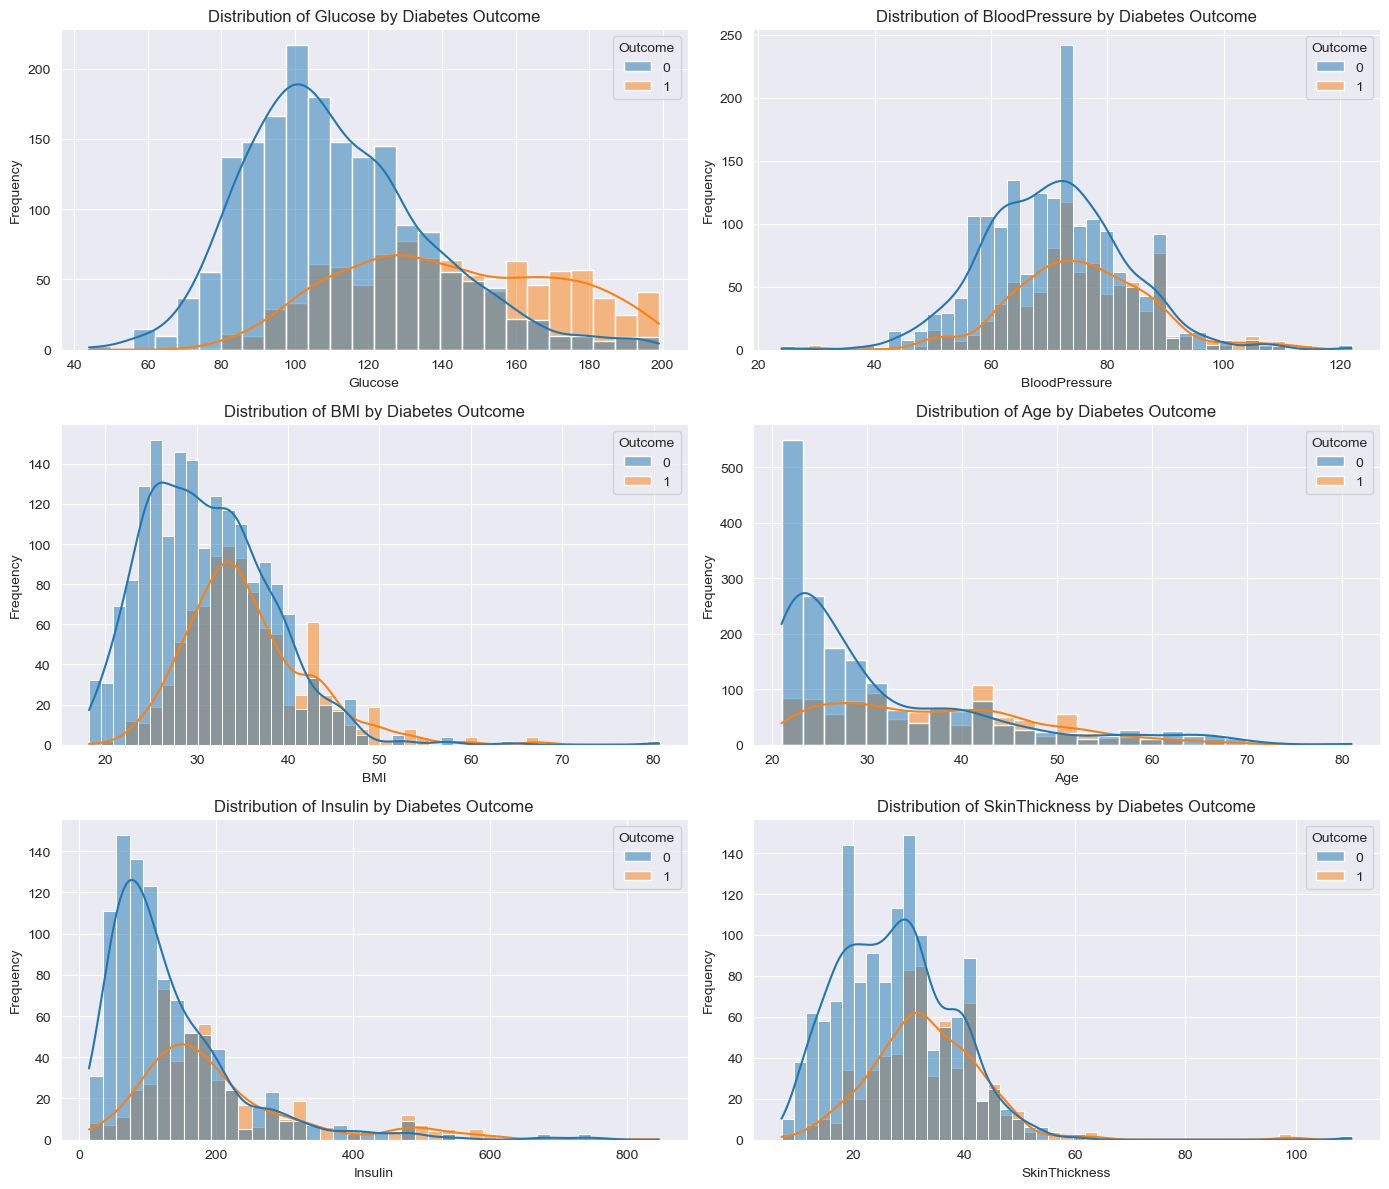

In [9]:
# Set up a 3x2 grid of subplots with specified figure size and spacing
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()  # Flatten the array of axes for easy iteration

# List of variables for which we want to plot distributions
variables = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin', 'SkinThickness']

# Loop through each variable to create a histogram for each
for i, var in enumerate(variables):
    # Filter out rows where the current variable has a 0 value before plotting
    filtered_data = data[data[var] > 0]

    # Plot a histogram with kernel density estimate (KDE) for the filtered data
    # Hue is used to differentiate between diabetes outcomes (0 or 1)
    sns.histplot(data=filtered_data, x=var, hue="Outcome", kde=True, ax=axs[i])

    # Set the title for each subplot to indicate the variable being plotted and that it's by diabetes outcome
    axs[i].set_title(f'Distribution of {var} by Diabetes Outcome')

    # Label the y-axis as 'Frequency' to denote the count of occurrences in each bin
    axs[i].set_ylabel('Frequency')

    # Label the x-axis with the name of the variable being plotted
    axs[i].set_xlabel(var)

# Adjust the layout so that plots do not overlap with each other
plt.tight_layout()
plt.show()

## Correlation Analysis Results Interpretation

In [10]:
# Drop the id column as it's just an identifier and not useful for prediction
data = data.drop(columns=["Id"])

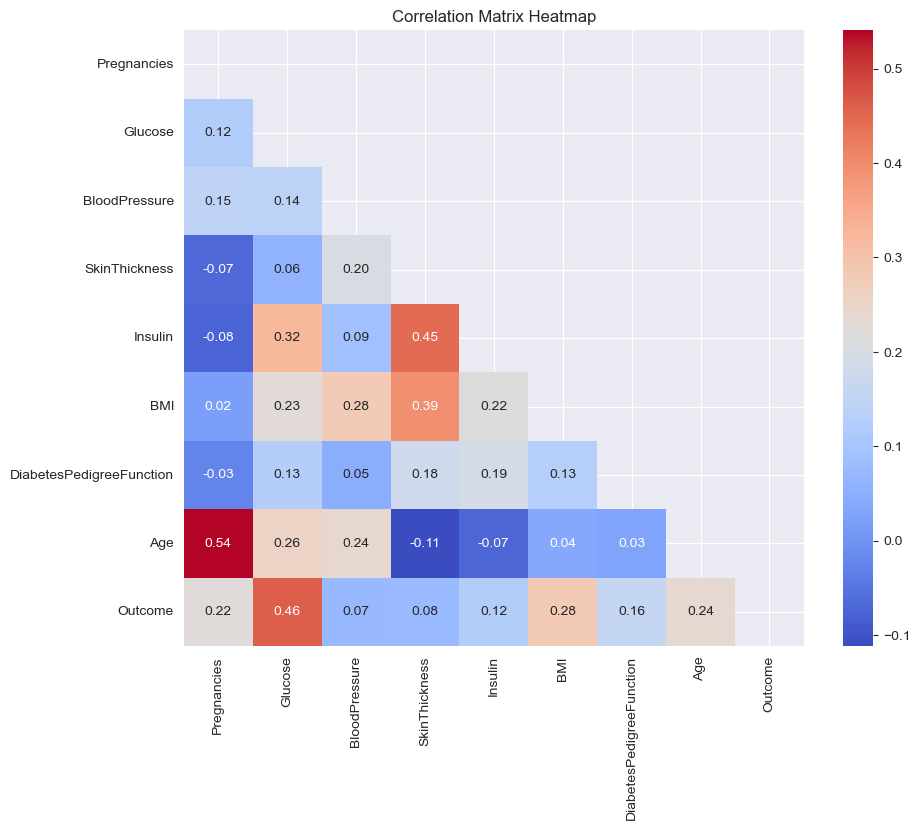

In [11]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Mask the upper triangle to remove redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure size
plt.figure(figsize=(10, 8))

# Create a heatmap visualization of the correlation matrix using seaborn
# 'annot=True' displays the correlation values in each cell of the heatmap
# 'cmap='coolwarm'' specifies the color map to differentiate positive from negative correlations
# 'fmt=".2f"' formats the correlation values to two decimal places
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

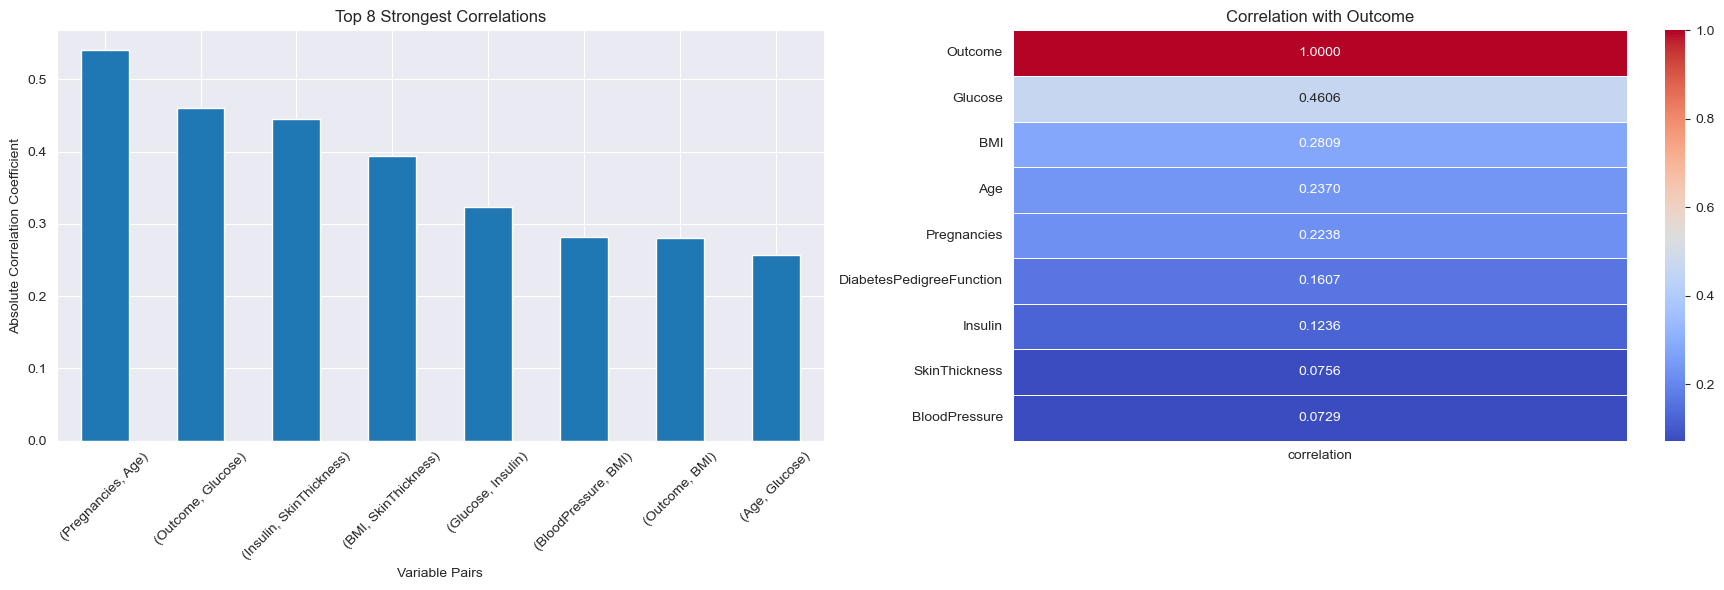

Pregnancies    Age              0.540805
Outcome        Glucose          0.460644
Insulin        SkinThickness    0.445345
BMI            SkinThickness    0.393494
Glucose        Insulin          0.323445
BloodPressure  BMI              0.281560
Outcome        BMI              0.280928
Age            Glucose          0.256958
dtype: float64


In [12]:
# Assuming 'data' is your DataFrame
# Select only the numeric columns, excluding 'AgeGroup'
numeric_cols = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Flatten the correlation matrix to a Series, take the absolute values to focus on the strength of correlations regardless of their direction,
# and sort these values in descending order to prioritize stronger correlations.
sorted_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out self-correlations (correlation of a variable with itself) which are always 1,
# since they do not provide useful information for identifying patterns between different variables.
sorted_correlations = sorted_correlations[sorted_correlations < 1]  # Exclude self-correlations

# Each pair of variables appears twice in the Series (A with B, and B with A), so drop duplicate pairs to simplify the analysis.
sorted_correlations = sorted_correlations.drop_duplicates()

# These pairs of variables have the highest absolute correlation coefficients, indicating strong linear relationships.
top_correlations = sorted_correlations.head(8)

# Calculate the correlations of all variables with 'Outcome'
corr_with_outcome = numeric_cols.corrwith(numeric_cols['Outcome']).sort_values(ascending=False)

# Create a DataFrame from the correlations for visualization
corr_df = pd.DataFrame(corr_with_outcome, columns=['correlation'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart for the top correlations
top_correlations.plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 8 Strongest Correlations')
axes[0].set_xlabel('Variable Pairs')
axes[0].set_ylabel('Absolute Correlation Coefficient')
axes[0].tick_params(axis='x', rotation=45)

# Plot the correlation heatmap
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5, ax=axes[1])
axes[1].set_title('Correlation with Outcome')

plt.tight_layout()
plt.show()

# Display the top 8 strongest correlations found in the dataset.
print(top_correlations)

### Correlation Analysis Results Interpretation

The correlation analysis conducted as part of the exploratory data analysis reveals several noteworthy relationships between variables within our diabetes dataset. Understanding these correlations is fundamental in identifying key factors that may influence diabetes outcomes. Below, we discuss the implications of the significant correlations identified:

- **Pregnancies and Age (Correlation: 0.540805):** This strong positive correlation indicates that as age increases, the number of pregnancies tends to increase as well. This relationship is biologically plausible and highlights the importance of considering age as a factor in studies related to pregnancy outcomes. In the context of diabetes, this correlation might suggest a demographic segment that requires particular attention due to potential gestational diabetes risks.

- **Outcome and Glucose (Correlation: 0.460644):** The positive correlation between diabetes outcome and glucose levels underscores the critical role of glucose monitoring in diabetes management. This finding supports existing medical understanding that elevated glucose levels are a significant indicator of diabetes. It underscores the necessity of including glucose levels as a primary predictor in models aiming to predict diabetes outcomes.

- **Insulin and Skin Thickness (Correlation: 0.445345):** The moderate positive correlation suggests a relationship between insulin levels and skin thickness. This might indicate that individuals with higher insulin levels could exhibit greater skin thickness, potentially reflecting insulin resistance—a condition often associated with type 2 diabetes. This insight can be instrumental in exploring physiological markers that correlate with insulin resistance.

- **BMI and Skin Thickness (Correlation: 0.393494):** The positive correlation here suggests that as body mass index (BMI) increases, skin thickness also tends to increase. This relationship could be related to the overall increase in adipose tissue, which might affect skin structure and function. Given the known association between obesity (high BMI) and diabetes risk, this correlation could further emphasize the physical manifestations associated with obesity that are relevant to diabetes.

- **Glucose and Insulin (Correlation: 0.323445):** This correlation, while moderate, highlights the relationship between glucose levels and insulin production. It aligns with the physiological mechanism where increased glucose levels trigger the pancreas to produce more insulin. This finding is fundamental for understanding diabetes pathophysiology and supports the inclusion of both glucose and insulin levels in predictive modeling of diabetes.

These correlations not only shed light on the complex interactions between various physiological parameters but also guide the subsequent analytical steps. They underscore the importance of considering a multifaceted approach to diabetes prediction, which incorporates a range of factors from demographic variables like age to physiological measurements such as glucose, insulin, and BMI. The insights derived from this correlation analysis will be instrumental in refining our predictive models, ensuring they are grounded in a nuanced understanding of the factors influencing diabetes outcomes.

# **Research Objectives**
**The primary goal of this study is to analyze and identify patterns in health metrics that significantly correlate with diabetes outcomes, with a special focus on BMI and skin thickness. It aims to elucidate the extent to which these metrics can serve as reliable predictors of diabetes risk.**

**Upon examining the correlation matrix heatmap of our dataset, it is evident that there are several pronounced correlations between various variables. These relationships are not only statistically significant but also suggest potential underlying patterns that warrant further investigation. In light of these findings, our next steps will be to meticulously explore these notable correlations. We aim to understand the dynamics and implications of these relationships better, especially in the context of predicting outcomes or identifying key influencers within the data. This exploration is crucial for enhancing our analytical models and refining our predictions, thereby contributing to more informed decision-making based on the dataset.**

# **Identifying patterns in correlations**

C:\Users\ninta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


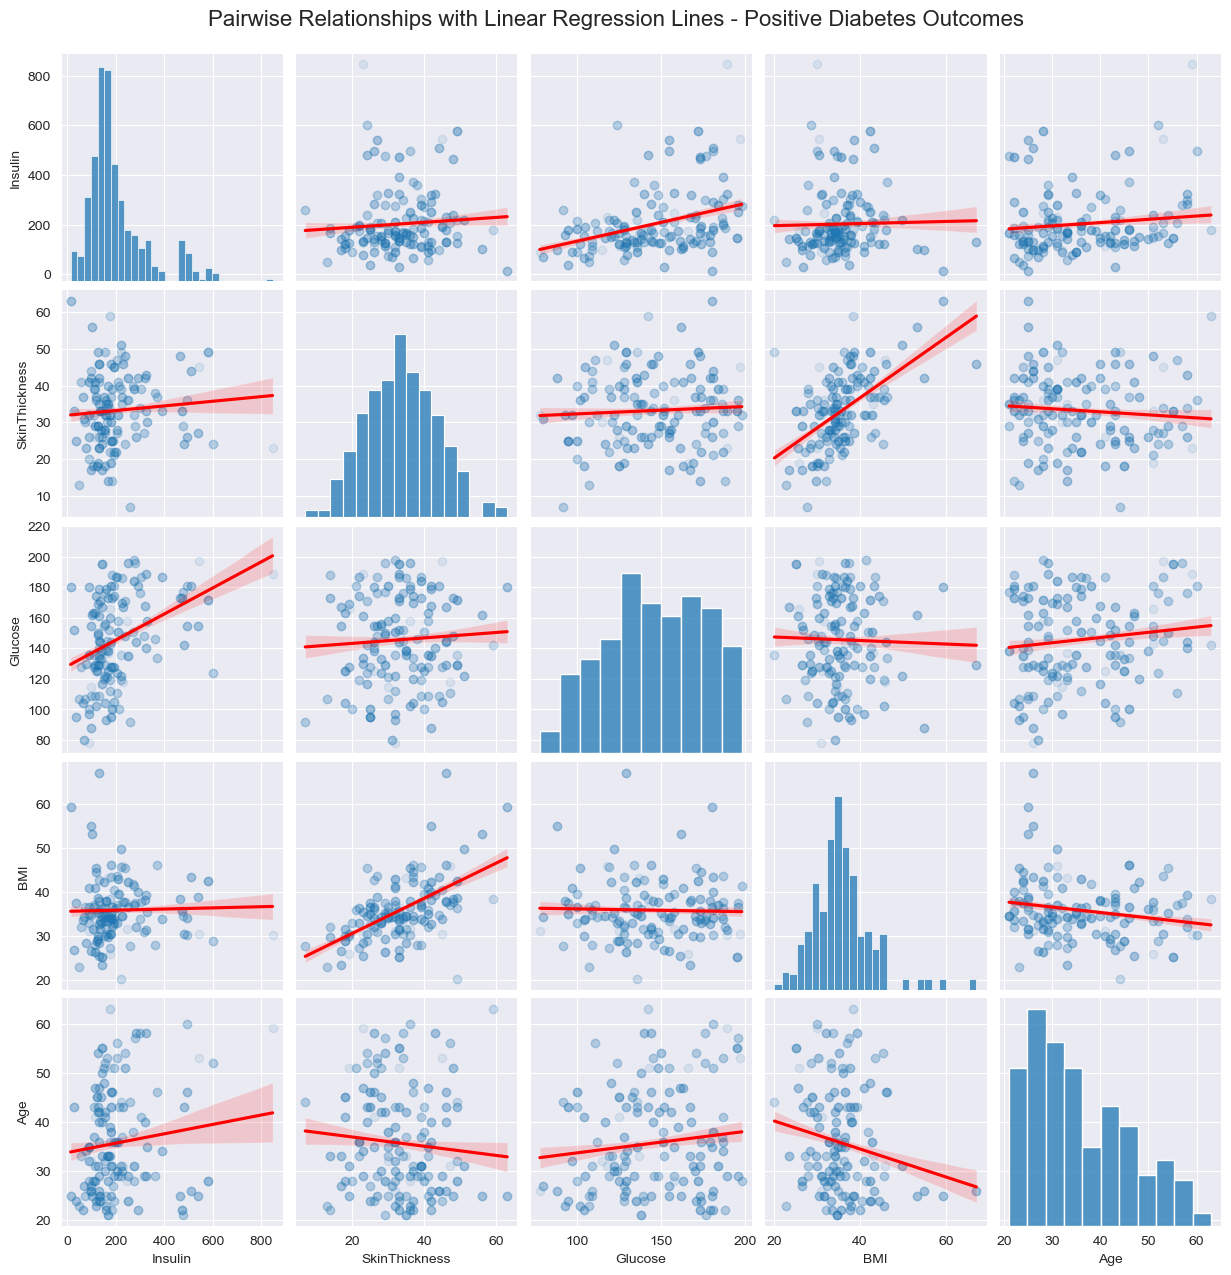

In [13]:
# Filter to include only positive outcomes and remove rows with 0 values in specified columns
positive_filtered_data = data[(data['Insulin'] > 0) &
                              (data['SkinThickness'] > 0) &
                              (data['Glucose'] > 0) &
                              (data['BMI'] > 0) &
                              (data['Age'] > 0) &
                              (data['Outcome'] == 1)]

# Creating a subset of columns to focus on specific variables
subset_positive_filtered_data = positive_filtered_data[['Insulin', 'SkinThickness', 'Glucose', 'BMI', 'Age']]

# Generate the pairplot with linear regression lines for each pair in the filtered subset
pairplot = sns.pairplot(subset_positive_filtered_data, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

# Add a title to the figure
plt.suptitle('Pairwise Relationships with Linear Regression Lines - Positive Diabetes Outcomes', size=16, y=1.02)

plt.show()

By exploring the linear regression lines in the pairplot, we can observe the relationships between various health metrics and diabetes outcomes. These visualizations provide insights into the potential correlations between different variables and the outcome of interest. The regression lines help identify trends and patterns that may be indicative of predictive relationships, guiding further analysis and model development.

## **Pregancies and Age**

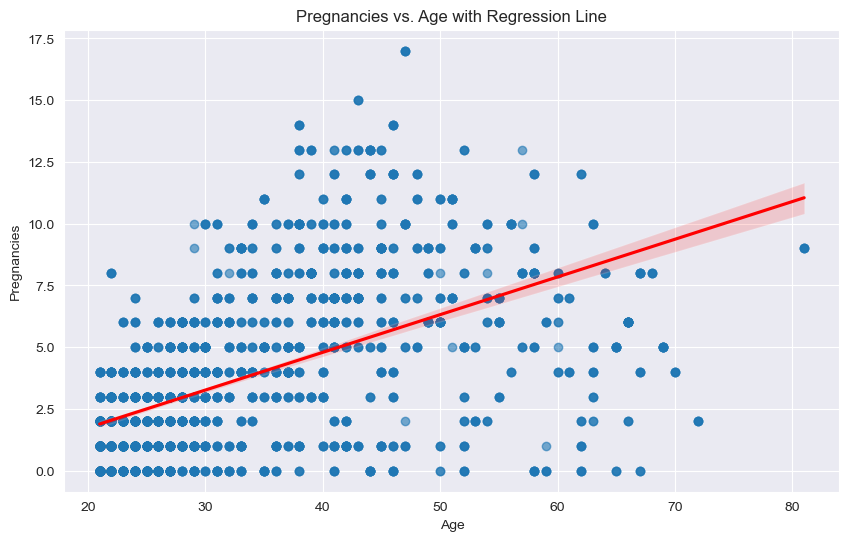

In [14]:
plt.figure(figsize=(10, 6))
# Use regplot instead of scatterplot to include a regression line
sns.regplot(x='Age', y='Pregnancies', data=data, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Pregnancies vs. Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

In analyzing the relationship between age and the number of pregnancies among women, our data visualization and statistical analysis reveal a noteworthy trend: as women age, they are more likely to have experienced pregnancy. This pattern is visually underscored by a regression analysis, where a positive slope in the regression line on the scatter plot of pregnancies versus age indicates an increase in the number of pregnancies as age advances.

This correlation aligns with intuitive and biological understandings of reproductive patterns. Typically, the opportunity for pregnancy begins with puberty and extends until menopause. Therefore, the cumulative likelihood of pregnancy increases with age. However, it's important to recognize that this trend is not solely a function of biological capability but is also influenced by personal choices, societal norms, and cultural practices regarding family planning and childbearing.

Moreover, the trend observed suggests that, on average, older women in the dataset have been pregnant more times than their younger counterparts. This observation could be reflective of both biological opportunities for pregnancy over a woman's lifetime and the complex interplay of societal, economic, and personal factors that influence decisions about if and when to have children.

It's crucial to note, however, that while the data shows a general trend, individual experiences can vary widely based on a multitude of factors. These include but are not limited to, fertility issues, access to healthcare and family planning resources, career considerations, and personal choice.

In conclusion, our analysis suggests a clear correlation between age and the number of pregnancies, highlighting a fundamental aspect of reproductive health and demographics. Understanding this relationship is crucial for healthcare providers, policymakers, and individuals as they make informed decisions about reproductive health and family planning.

## **Glucose and diabetes outcome**

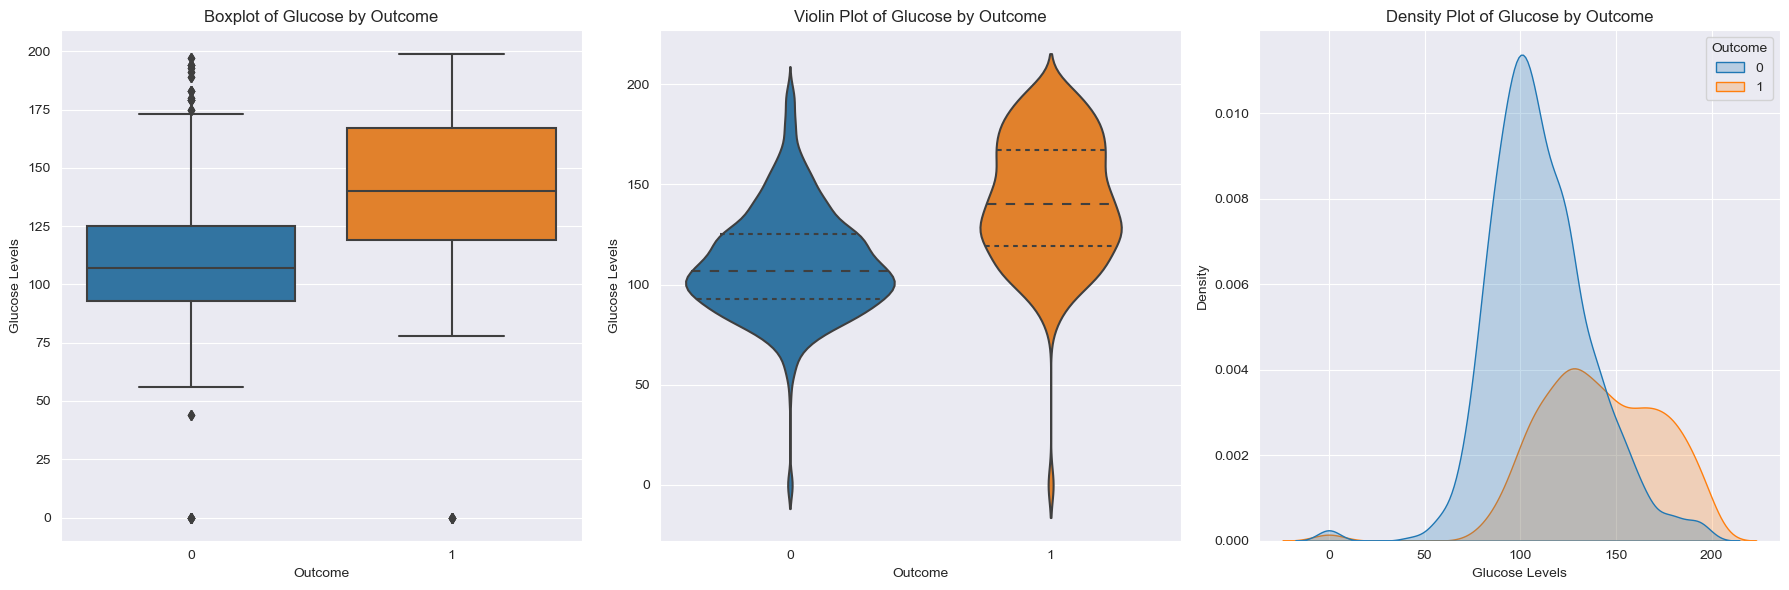

In [15]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot
sns.boxplot(x='Outcome', y='Glucose', data=data, ax=axes[0])
axes[0].set_title('Boxplot of Glucose by Outcome')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Glucose Levels')

# Violin Plot
sns.violinplot(x='Outcome', y='Glucose', data=data, ax=axes[1], inner="quartile")
axes[1].set_title('Violin Plot of Glucose by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Glucose Levels')

# Density Plot
sns.kdeplot(data=data, x='Glucose', hue='Outcome', fill=True, ax=axes[2])
axes[2].set_title('Density Plot of Glucose by Outcome')
axes[2].set_xlabel('Glucose Levels')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

Accuracy of the Decision Tree model: 0.76
Precision of the Decision Tree model (weighted): 0.75


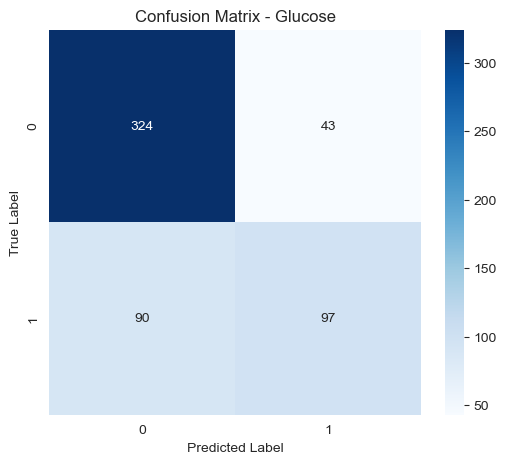

Classification Report for the Decision Tree model trained on Glucose:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       367
           1       0.69      0.52      0.59       187

    accuracy                           0.76       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554


In [16]:
# Prepare features (X) by selecting only 'Glucose' and target (y)
X = data[['Glucose']]
y = data['Outcome']

# Note: Scaling is not necessary for Decision Trees, but we'll keep the structure similar for consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate and print the accuracy and weighted precision of the model
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')
print(f'Precision of the Decision Tree model (weighted): {precision_weighted:.2f}')

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Glucose')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("Classification Report for the Decision Tree model trained on Glucose:")
print(classification_report(y_test, y_pred))

## **The Role of Glucose Levels in Predicting Diabetes Risk**

Our analysis highlights plasma glucose concentration, measured through an oral glucose tolerance test, as a crucial marker for assessing the risk of diabetes. Glucose's critical role in metabolic processes and its regulation by insulin—essential for maintaining appropriate blood sugar levels—anchors its significance. Notably, elevated glucose levels post-meal may indicate the body's diminished capacity to metabolize sugar, a defining trait of diabetes.

The pivotal role of glucose levels in diabetes diagnosis is extensively recognized, serving as a foundational aspect of both management and preventive measures against the disease. Elevated glucose readings may signify a heightened risk for diabetes, attributable to either a lack of insulin production (Type 1 diabetes) or insulin resistance (Type 2 diabetes). This evident linkage between glucose concentrations and diabetes risk highlights the necessity of integrating glucose level measurements into models designed to pinpoint individuals at elevated risk for the condition.

Nonetheless, it's imperative to recognize the complexity of diabetes' pathophysiology, shaped by an intricate blend of genetic, lifestyle, and environmental contributors. Thus, while glucose levels offer an essential perspective on diabetes risk, they represent merely a single component of a broader array of factors warranting consideration. Factoring in additional variables such as BMI, age, insulin levels, and the Diabetes Pedigree Function enables a more detailed risk evaluation. Through a comprehensive approach that considers various health indicators, our research endeavors to enhance the accuracy and personalization of diabetes risk assessments, thereby guiding more effective prevention and management approaches.

# **SkinThickness: Exploring the Relationship**
Analyzing the two scatter plots with their respective regression lines—focusing on the relationships between 'Insulin' vs. 'SkinThickness' and 'BMI' vs. 'SkinThickness' among individuals with positive diabetes outcomes—we observe distinct patterns that could have implications for understanding the condition better.


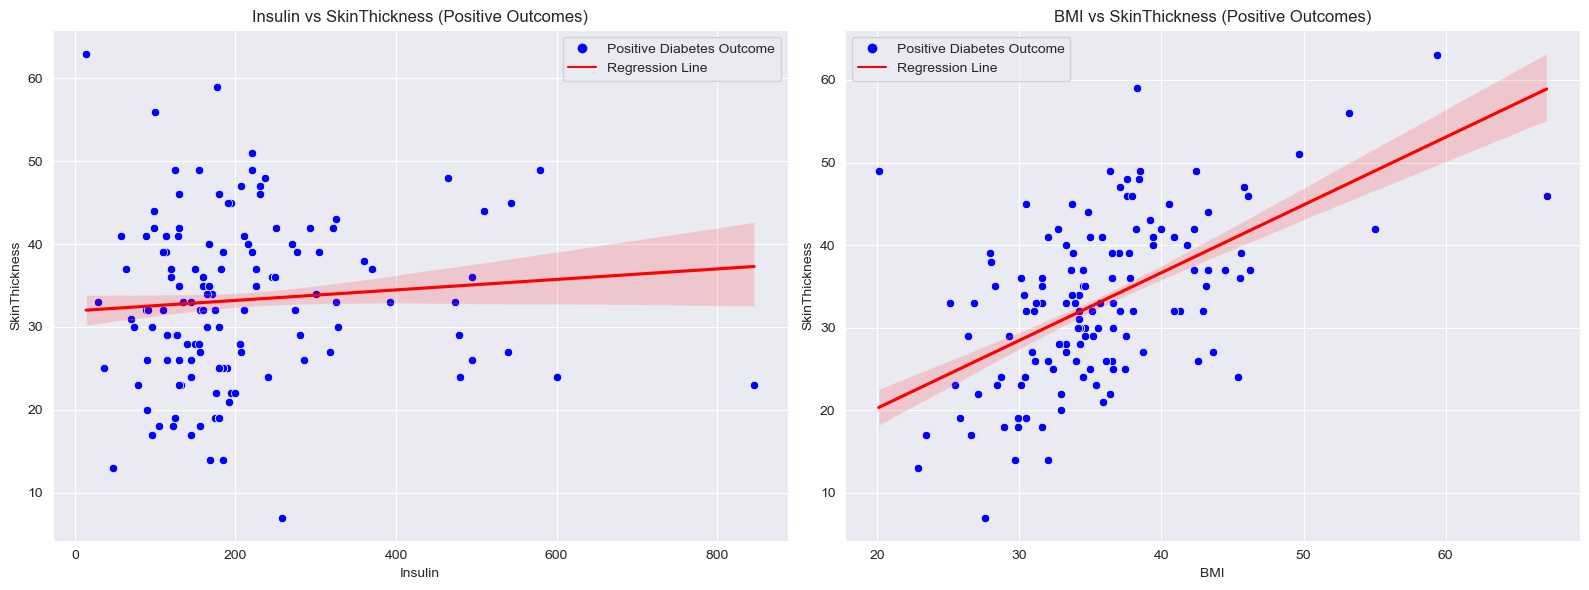

In [17]:
# Filter the dataset for positive diabetes outcomes and exclude zero values for 'Insulin', 'BMI', and 'SkinThickness'
positive_filtered_data = data[(data['Outcome'] == 1) &
                              (data['Insulin'] > 0) &
                              (data['BMI'] > 0) &
                              (data['SkinThickness'] > 0)]

# Set up the figure for the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the scatter and regression for Insulin vs SkinThickness
sns.scatterplot(data=positive_filtered_data, x='Insulin', y='SkinThickness', ax=axes[0], color='blue')
sns.regplot(data=positive_filtered_data, x='Insulin', y='SkinThickness', ax=axes[0], scatter=False, color='red', line_kws={'label': "Regression Line"})

# Plotting the scatter and regression for BMI vs SkinThickness
sns.scatterplot(data=positive_filtered_data, x='BMI', y='SkinThickness', ax=axes[1], color='blue')
sns.regplot(data=positive_filtered_data, x='BMI', y='SkinThickness', ax=axes[1], scatter=False, color='red', line_kws={'label': "Regression Line"})

# Setting titles for each subplot
axes[0].set_title('Insulin vs SkinThickness (Positive Outcomes)')
axes[1].set_title('BMI vs SkinThickness (Positive Outcomes)')

# Create custom legend handles
scatter_legend = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='Positive Diabetes Outcome')
regression_legend = mlines.Line2D([], [], color='red', label='Regression Line')

# Add custom legends to both subplots
axes[0].legend(handles=[scatter_legend, regression_legend])
axes[1].legend(handles=[scatter_legend, regression_legend])

plt.tight_layout()
plt.show()

## **Insulin and SkinThickness Relationship**

In our analysis of the relationship between Insulin levels and Skin Thickness within a diabetes dataset, we initially identified a correlation coefficient of 0.445, suggesting a moderate positive correlation between these two variables. This value implied that as Insulin levels increase, Skin Thickness might also tend to increase, albeit not strongly. However, subsequent visual and statistical analyses have provided a more nuanced view of their relationship, raising questions beyond the surface-level correlation.

Upon examining a regression line plotted between Insulin and Skin Thickness, we observed that it was almost flat with only a slight inclination. This observation was contrary to expectations based on the correlation coefficient, indicating that the relationship might not be as straightforward or linear as initially thought.

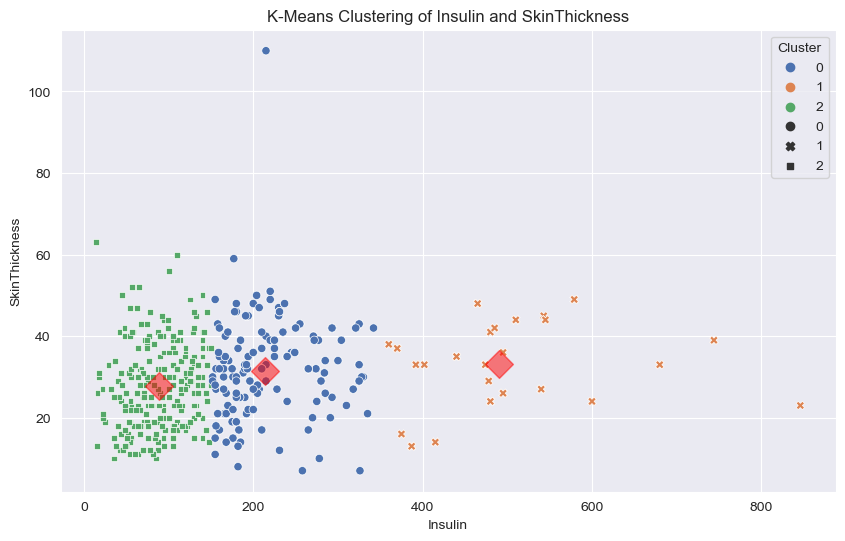

In [18]:
# Filter out rows where 'Insulin' or 'SkinThickness' values are 0
filtered_data = data[(data['Insulin'] > 0) & (data['SkinThickness'] > 0)].copy()  # Ensure we're working with a copy

# Select only the 'Insulin' and 'SkinThickness' columns for clustering
X = filtered_data[['Insulin', 'SkinThickness']]

# Apply K-Means clustering
# The number of clusters (n_clusters) is arbitrarily set to 3 for this example; adjust as needed
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign the cluster centers
centers = kmeans.cluster_centers_

# Use .loc to avoid SettingWithCopyWarning
filtered_data.loc[:, 'Cluster'] = kmeans.labels_

# Plot the clusters along with the cluster centers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Insulin', y='SkinThickness', hue='Cluster', palette='deep', data=filtered_data, style=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='D')  # Plot cluster centers
plt.title('K-Means Clustering of Insulin and SkinThickness')
plt.xlabel('Insulin')
plt.ylabel('SkinThickness')
plt.legend(title='Cluster')
plt.show()

Further analysis using K-Means clustering revealed three distinct groups within the dataset. This finding suggests underlying patterns or subpopulations that are not immediately explained by the correlation between Insulin and Skin Thickness alone. The clusters might reflect different physiological states or conditions within the diabetic population that are not captured by these two variables in isolation.

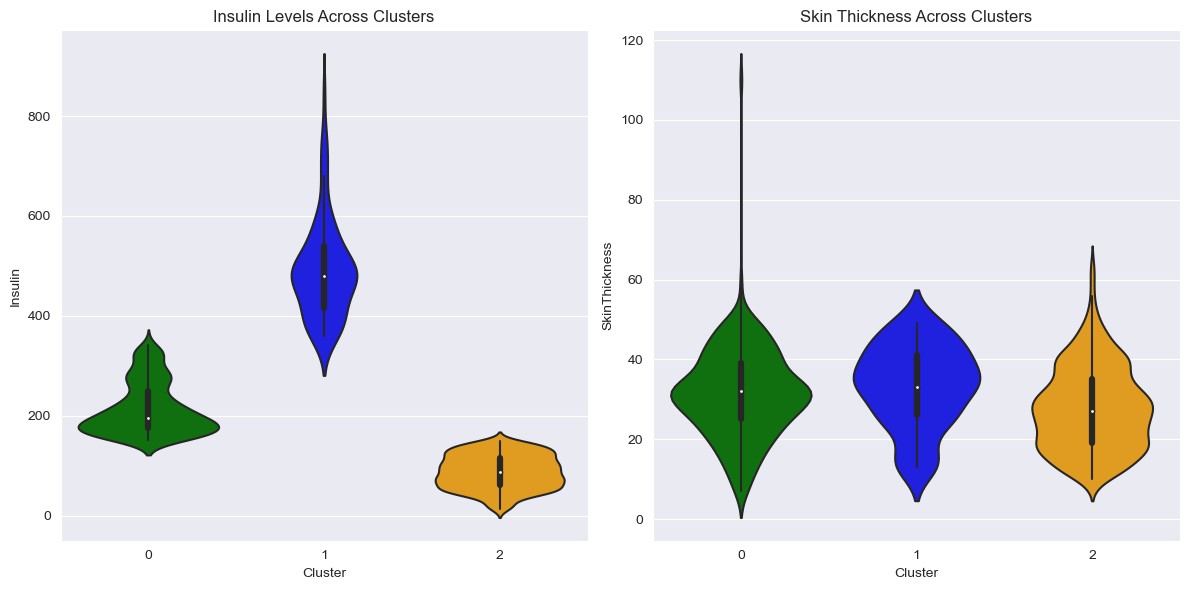

In [19]:
cluster_palette = {0: 'green', 1: 'blue', 2: 'orange'}

# Violin plots for 'Insulin' and 'SkinThickness' by cluster, with colors matched to the scatter plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Violin plot for 'Insulin' with specified cluster colors
sns.violinplot(x='Cluster', y='Insulin', data=filtered_data, ax=axs[0], palette=cluster_palette)
axs[0].set_title('Insulin Levels Across Clusters')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Insulin')

# Violin plot for 'SkinThickness' with specified cluster colors
sns.violinplot(x='Cluster', y='SkinThickness', data=filtered_data, ax=axs[1], palette=cluster_palette)
axs[1].set_title('Skin Thickness Across Clusters')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('SkinThickness')

plt.tight_layout()
plt.show()

The violin plots, designed to show the distribution of Insulin and Skin Thickness values within each cluster, revealed no obvious similarities between the groups. Each cluster displayed unique patterns in terms of distribution and density of the variables, suggesting that the correlation does not manifest uniformly across the dataset.

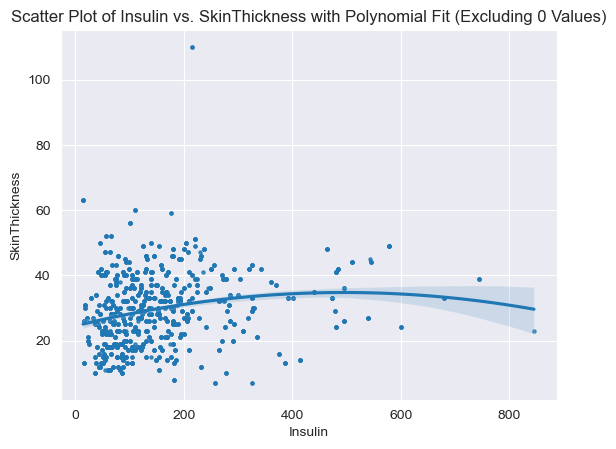

In [20]:
# Filter out rows where both 'Insulin' and 'SkinThickness' values are greater than 0
filtered_data = data[(data['Insulin'] > 0) & (data['SkinThickness'] > 0)]

# Scatter plot with a polynomial fit line
sns.regplot(x='Insulin', y='SkinThickness', data=filtered_data, order=2, scatter_kws={'s': 5})
plt.title('Scatter Plot of Insulin vs. SkinThickness with Polynomial Fit (Excluding 0 Values)')
plt.show()

A scatter plot with a polynomial fit line, resembling an upside-down smile, further indicated that the relationship between Insulin and Skin Thickness might be non-linear, with potential inflection points that a simple linear analysis could not capture.

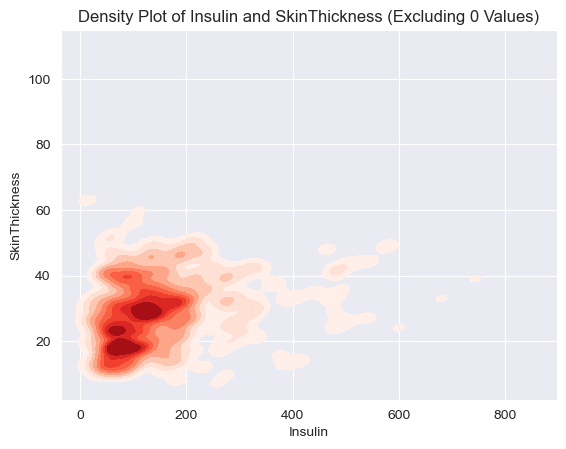

In [21]:
# Filter out rows where both 'Insulin' and 'SkinThickness' values are greater than 0
filtered_data = data[(data['Insulin'] > 0) & (data['SkinThickness'] > 0)]

# Plot the density plot
sns.kdeplot(x=filtered_data['Insulin'], y=filtered_data['SkinThickness'], cmap="Reds", shade=True, bw_adjust=.5)
plt.title('Density Plot of Insulin and SkinThickness (Excluding 0 Values)')
plt.xlabel('Insulin')
plt.ylabel('SkinThickness')
plt.show()

Density plot highlighted a significant concentration of data points around 40 units of Skin Thickness and 200 units of Insulin. This dense region indicates a common physiological measurement range for individuals in the dataset, yet it does not clarify the nature of their relationship.

Accuracy of the Logistic Regression model: 0.67
Precision of the Logistic Regression model (weighted): 0.67


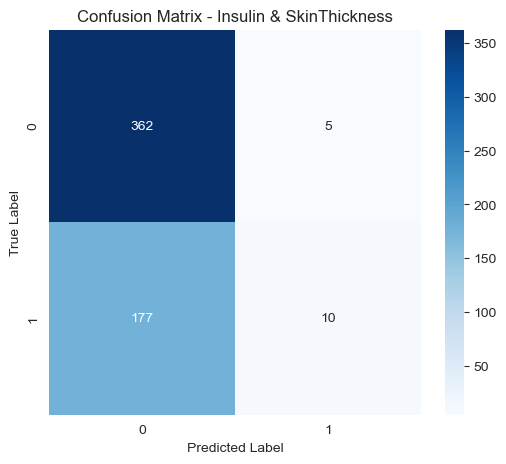

Classification Report for the Logistic Regression model trained on Insulin and SkinThickness:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       367
           1       0.67      0.05      0.10       187

    accuracy                           0.67       554
   macro avg       0.67      0.52      0.45       554
weighted avg       0.67      0.67      0.56       554


In [22]:
# Prepare features (X) by selecting only 'Insulin' and 'SkinThickness' and target (y)
X = data[['Insulin', 'SkinThickness']]
y = data['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Calculate and print the accuracy and weighted precision of the model
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy of the Logistic Regression model: {accuracy:.2f}')
print(f'Precision of the Logistic Regression model (weighted): {precision_weighted:.2f}')

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Insulin & SkinThickness')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("Classification Report for the Logistic Regression model trained on Insulin and SkinThickness:")
print(classification_report(y_test, y_pred))


All these observations lead us to conclude that the initial correlation, while statistically significant, does not fully explain the complex interplay between Insulin and Skin Thickness in the context of diabetes. The almost flat regression line, distinct clusters in K-Means analysis, diverse distributions in violin plots, non-linear patterns in polynomial fitting, and the concentration observed in the density plot all suggest that other factors must be considered. These might include the role of genetics, lifestyle, other biochemical markers, or the progression stage of diabetes.

**Conclusion**
While Insulin levels and Skin Thickness share a moderate correlation, our comprehensive analysis reveals that this relationship is far from simple and is influenced by multiple underlying factors. This complexity invites further investigation into other variables that might interact with Insulin and Skin Thickness, contributing to the overall risk profile and physiological characteristics of diabetes patients. Our findings underscore the importance of a holistic approach in medical research, where single correlations are contextualized within the broader, multifactorial landscape of human health.


## **BMI and SkinThickness Relationship**

As previous seen in the regression line plot, the relationship between BMI and Skin Thickness exhibited a positive slope, indicating a direct correlation between these two variables. This positive linear relationship suggests that as BMI increases, skin thickness tends to increase as well. This observation aligns with the understanding that body mass index is a key indicator of body composition, reflecting factors such as fat distribution and accumulation. Skin thickness, in turn, can be influenced by changes in body composition, making it a relevant metric in assessing health outcomes, particularly in the context of diabetes.

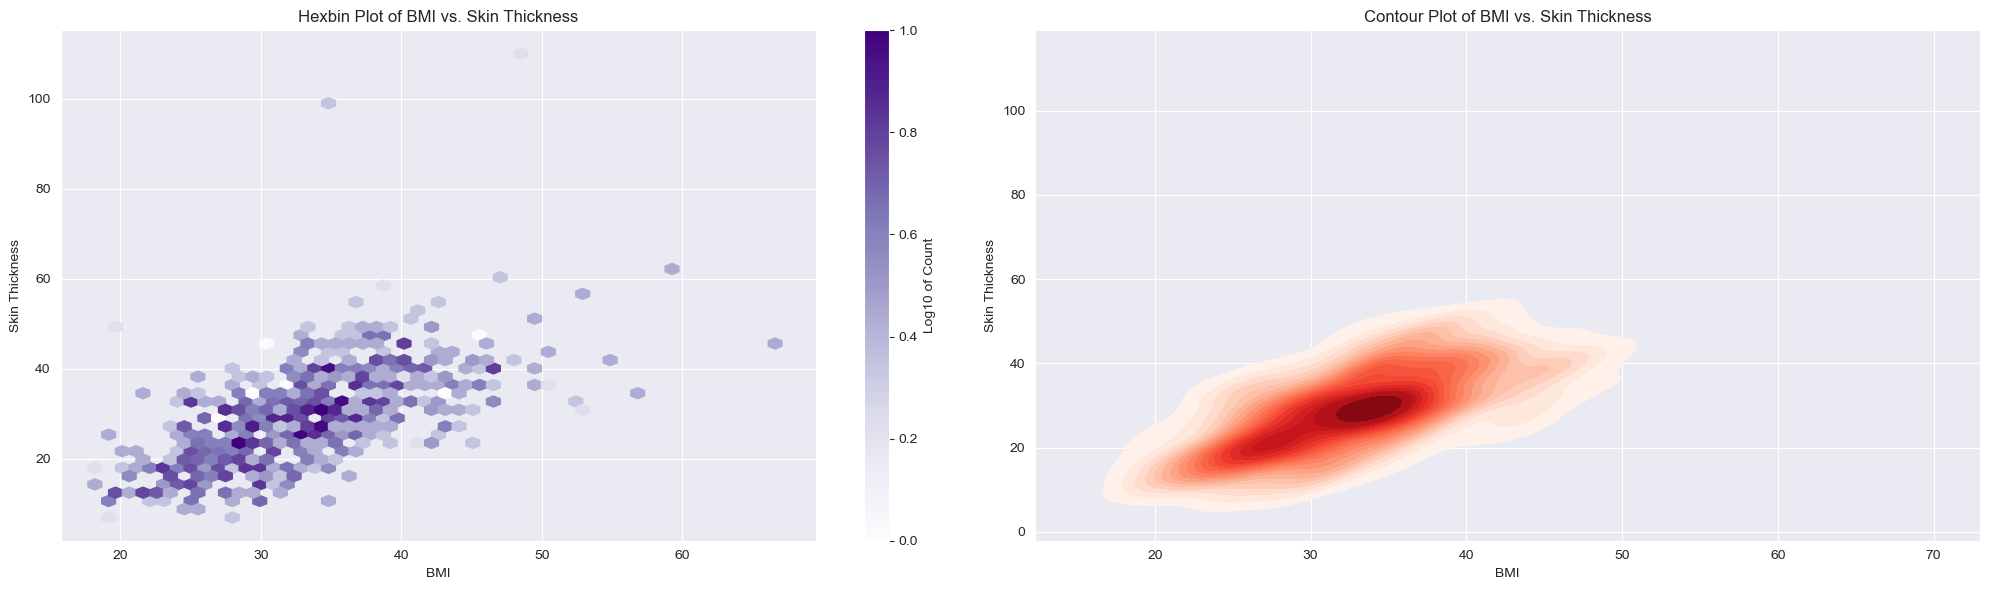

In [23]:
# Filter out rows where BMI or Skin Thickness is 0
filtered_data = data[(data['BMI'] > 0) & (data['SkinThickness'] > 0)]

# Set up the matplotlib figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Hexbin Plot with Density Scale on the left
axes[0].hexbin(filtered_data['BMI'], filtered_data['SkinThickness'], gridsize=50, cmap='Purples', bins='log')
cb = fig.colorbar(plt.cm.ScalarMappable(cmap='Purples'), ax=axes[0], orientation='vertical')
cb.set_label('Log10 of Count')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Skin Thickness')
axes[0].set_title('Hexbin Plot of BMI vs. Skin Thickness')

# Contour Plot on the right
sns.kdeplot(x=filtered_data['BMI'], y=filtered_data['SkinThickness'], levels=20, cmap="Reds", fill=True, ax=axes[1])
axes[1].set_title('Contour Plot of BMI vs. Skin Thickness')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Skin Thickness')

plt.tight_layout()
plt.show()

Upon examining the relationship between BMI and Skin Thickness in individuals from our dataset, particularly focusing on non-zero values, two distinct visualization techniques were employed: Hexbin plots and Contour plots. These visualizations were instrumental in uncovering the distribution patterns and densities of these two critical variables, providing deeper insights into their interplay.

### Hexbin Plot Findings:
The hexbin plot, characterized by its use of hexagonal binning and a logarithmic color scale, revealed a concentration of data points within specific regions of the BMI vs. Skin Thickness plane. Notably, the most intense areas, indicated by darker colors, suggest a moderate clustering of individuals around median BMI and Skin Thickness values. This density pattern implies that for a significant portion of our population, BMI and Skin Thickness values tend to aggregate around common physiological measurements, albeit with a wide dispersion reflecting the variability among individuals.

### Contour Plot Findings:
Complementing the hexbin plot, the contour plot offered a smoothed density visualization, with contour lines demarcating regions of similar point density. This plot highlighted an "upside-down smile" distribution pattern, wherein the highest density regions are centrally located, tapering off as we move towards higher or lower values of BMI and Skin Thickness. This pattern suggests a non-linear relationship between BMI and Skin Thickness, with most individuals having moderate values of both variables and fewer individuals at the extremes.

### Overall Analysis:
Both visualizations underscore a nuanced relationship between BMI and Skin Thickness that cannot be adequately captured through simple linear regression or correlation coefficients alone. The observed concentration of data points within specific ranges suggests that while there may be a general tendency for these variables to increase together, substantial variability exists. This variability indicates that other factors, possibly including genetic, lifestyle, or environmental influences, play significant roles in determining an individual's BMI and Skin Thickness.

Furthermore, the absence of a strong linear trend in the relationship suggests that while BMI and Skin Thickness are related, the nature of this relationship is complex and likely influenced by multifaceted physiological processes. It also underscores the importance of considering a broad range of factors when assessing health risks or outcomes associated with these measurements.

In conclusion, our analysis, while shedding light on the distribution and density patterns of BMI and Skin Thickness, raises further questions about the underlying factors driving these patterns. It emphasizes the need for a more comprehensive approach to understanding the physiological and possibly pathological implications of these measurements, particularly in the context of diabetes and metabolic health.

Accuracy of the KNN model: 0.79
Precision of the KNN model (weighted): 0.79


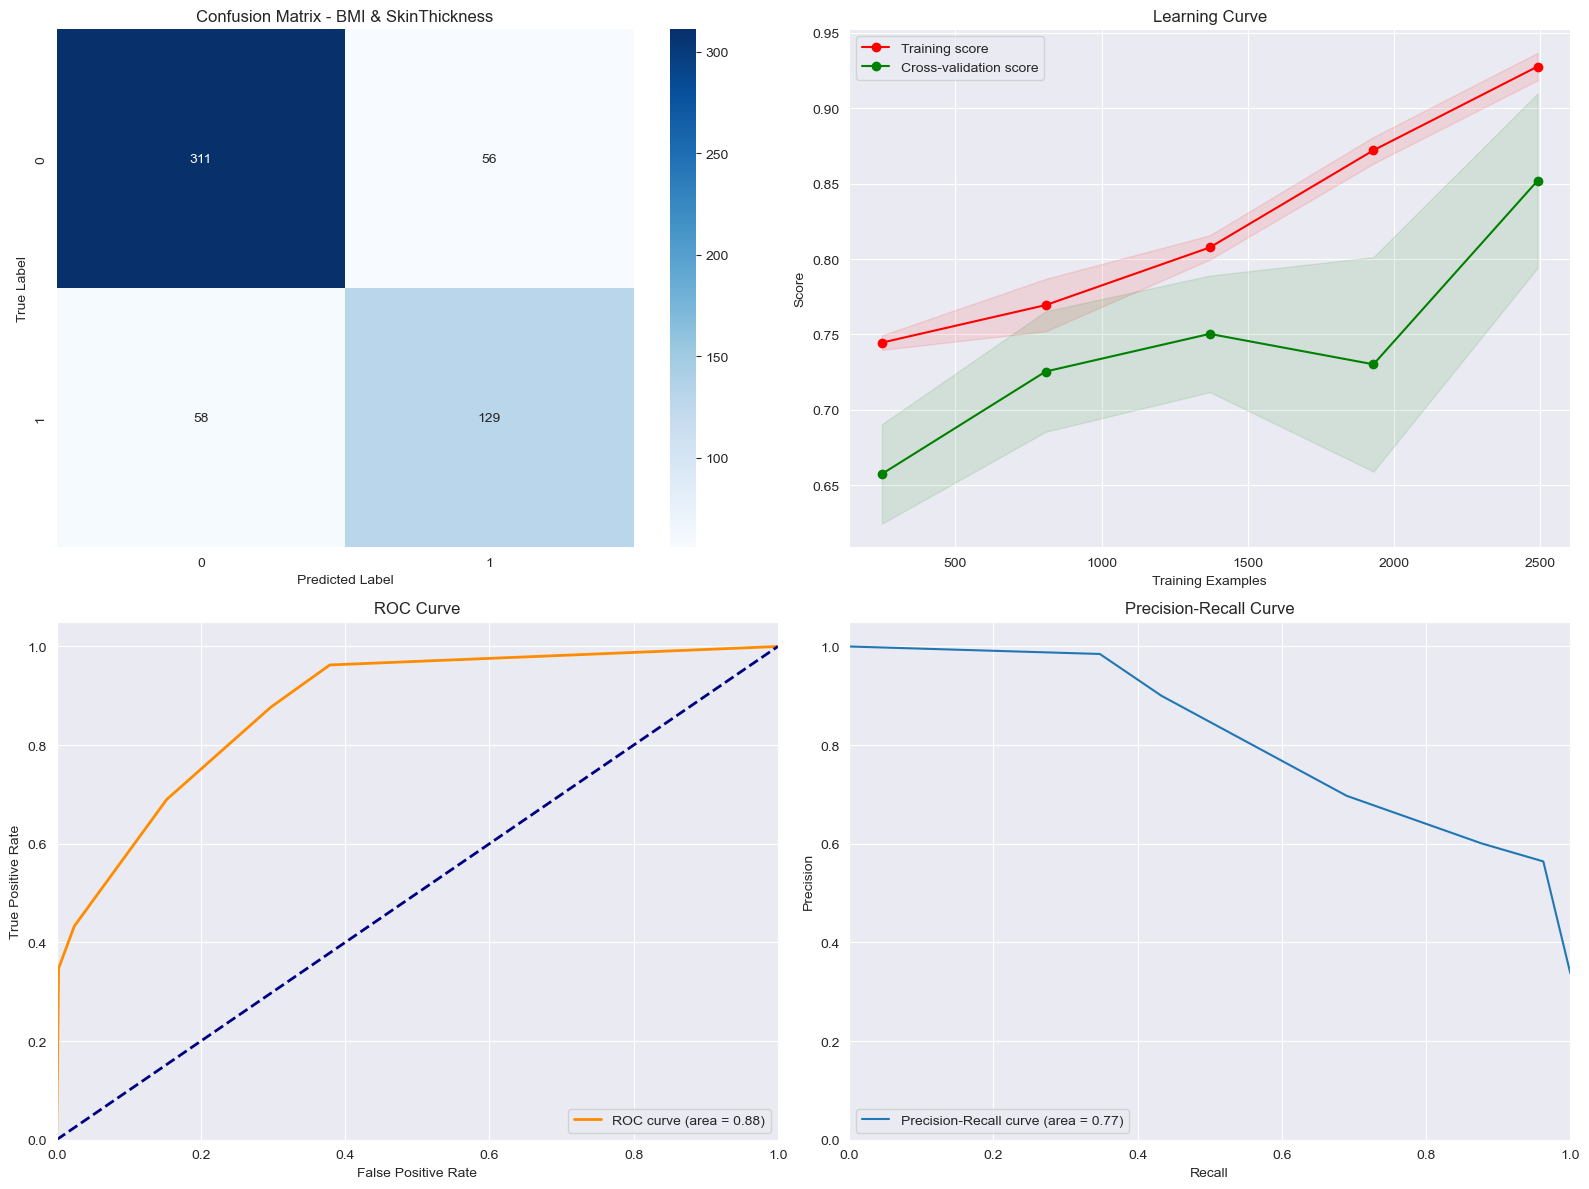

Classification Report for the KNN model trained on BMI and SkinThickness:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       367
           1       0.70      0.69      0.69       187

    accuracy                           0.79       554
   macro avg       0.77      0.77      0.77       554
weighted avg       0.79      0.79      0.79       554


In [24]:
# Prepare features (X) by selecting only 'BMI' and 'SkinThickness' and target (y)
X = data[['BMI', 'SkinThickness']]
y = data['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate and print the accuracy and weighted precision of the model
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy of the KNN model: {accuracy:.2f}')
print(f'Precision of the KNN model (weighted): {precision_weighted:.2f}')

# 2x2 visual aids setup
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('Confusion Matrix - BMI & SkinThickness')
axs[0, 0].set_xlabel('Predicted Label')
axs[0, 0].set_ylabel('True Label')

# Learning Curve
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5), ax=None):
    if ax is None:
        ax = plt.gca()

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=4)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                    np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
    ax.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                    np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
    ax.set_title('Learning Curve')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.legend(loc='best')
    ax.grid(True)

# Plotting Learning Curve after Confusion Matrix
plot_learning_curve(knn_model, X_scaled, y, cv=10, ax=axs[0, 1])

# ROC Curve and AUC
y_score = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve')
axs[1, 0].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
axs[1, 1].plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % average_precision)
axs[1, 1].set_xlabel('Recall')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_title('Precision-Recall Curve')
axs[1, 1].legend(loc="lower left")

plt.tight_layout()
plt.show()

print("Classification Report for the KNN model trained on BMI and SkinThickness:")
print(classification_report(y_test, y_pred))

Our analysis ventured into utilizing a K-Nearest Neighbors (KNN) model to predict diabetes outcomes based on two physiological measures: BMI (Body Mass Index) and Skin Thickness. These features were selected with the hypothesis that they might offer insight into the health status of individuals, particularly in relation to diabetes. The model's performance, as quantified by accuracy and precision metrics, sheds light on the predictive power of these variables and their interrelation with diabetes outcomes.

### Model Performance:
The KNN model achieved an accuracy and a weighted precision of 0.79. This level of performance indicates a relatively high degree of reliability in the model's predictions, considering the complexity of biological data and the multifactorial nature of diabetes. 

### Detailed Findings:
- **Precision and Recall:** The model displayed a precision of 0.84 for predicting negative outcomes (non-diabetic) and 0.70 for positive outcomes (diabetic), with recall rates of 0.85 and 0.69, respectively. This suggests that the model is slightly better at identifying individuals without diabetes but still maintains a good balance in its predictive capabilities for both classes.
- **F1-Score:** The F1-scores, which balance precision and recall, stand at 0.85 for negative outcomes and 0.69 for positive outcomes, further underscoring the model's balanced performance across both categories.

### Correlation Insights:
The effectiveness of the KNN model, based on BMI and Skin Thickness, in predicting diabetes outcomes does imply a significant correlation between these variables and diabetes status. However, it's essential to note that the model's accuracy and precision rates, while impressive, also highlight the presence of variability and the potential influence of other unaccounted factors. The model's success suggests that while BMI and Skin Thickness are correlated with diabetes outcomes, they are part of a more extensive network of interrelated factors contributing to the disease.

### Conclusion:
The KNN model's performance, with an accuracy and precision of 0.79, reinforces the importance of BMI and Skin Thickness as indicators in predicting diabetes outcomes. However, the nuanced results, particularly the balance between precision and recall for both outcome classes, underscore the complexity of predicting diabetes based solely on these measures. It indicates that BMI and Skin Thickness, despite their strong correlation with diabetes outcomes, should be considered within a broader diagnostic framework that includes additional factors for a more comprehensive understanding and prediction of diabetes risk.

# **Comparative analysis between Glucose and Insulin levels in the context of diabetes prediction**

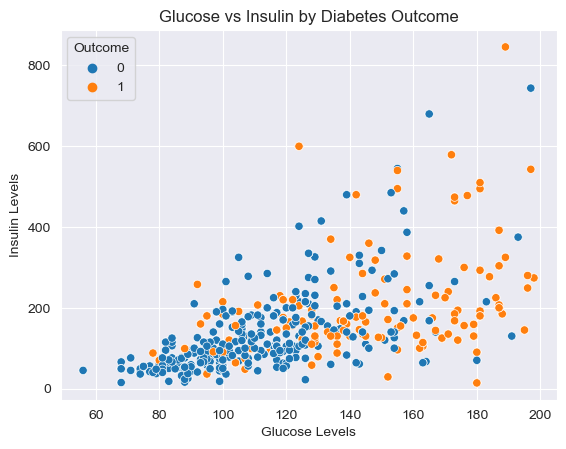

In [25]:
# Filter out rows where 'Glucose' or 'Insulin' values are 0 to exclude them from the analysis.
# This step ensures that the visualization reflects meaningful biological measurements.
filtered_data = data[(data['Glucose'] > 0) & (data['Insulin'] > 0)]

# Create a scatter plot to visualize the relationship between Glucose and Insulin levels.
# The 'hue' parameter is used to differentiate points by diabetes outcome, 
# providing insights into how these variables correlate with the presence or absence of diabetes.
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=filtered_data)

# Setting the title of the plot for better readability and to indicate the focus of the analysis.
plt.title('Glucose vs Insulin by Diabetes Outcome')

# Labeling the x-axis as 'Glucose Levels' to clarify the variable represented on this axis.
plt.xlabel('Glucose Levels')

# Labeling the y-axis as 'Insulin Levels' to clarify the variable represented on this axis.
plt.ylabel('Insulin Levels')

# Display the plot.
plt.show()

C:\Users\ninta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


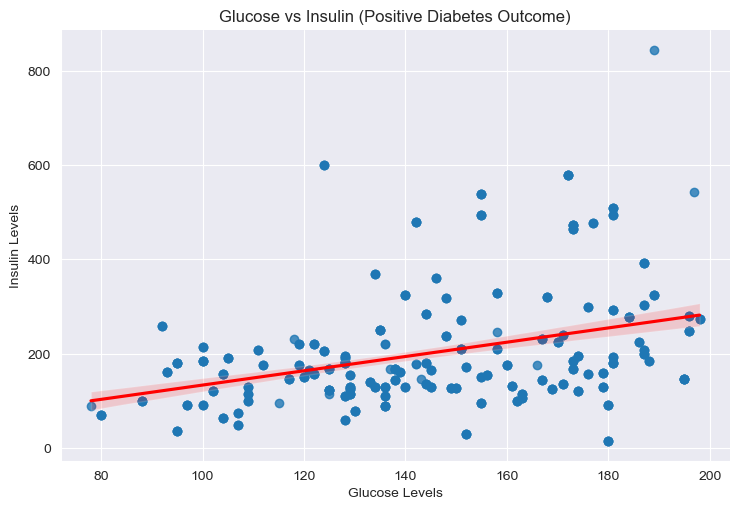

In [26]:
# Filter out rows where 'Glucose' or 'Insulin' values are 0 and the 'Outcome' is positive (1)
filtered_data_positive = data[(data['Glucose'] > 0) & (data['Insulin'] > 0) & (data['Outcome'] == 1)]

# Create a scatter plot with regression lines for the positive 'Outcome' category
sns.lmplot(x='Glucose', y='Insulin', data=filtered_data_positive, aspect=1.5, line_kws={'color': 'red'})

# Setting the title of the plot for better readability and to indicate the focus of the analysis
plt.title('Glucose vs Insulin (Positive Diabetes Outcome)')

# Labeling the x-axis as 'Glucose Levels' to clarify the variable represented on this axis
plt.xlabel('Glucose Levels')

# Labeling the y-axis as 'Insulin Levels' to clarify the variable represented on this axis
plt.ylabel('Insulin Levels')

# Display the plot
plt.show()

### Key Points:
- **Logistic Regression Model**: This model is applied separately with 'Glucose' and then 'Insulin' as the sole predictors to evaluate their individual contributions to predicting diabetes outcomes. Logistic Regression is apt for this task as it models the probability of a binary outcome based on the input features.
- **Classification Report**: This report provides a detailed performance analysis of the model for each feature, including metrics such as precision, recall, f1-score, and accuracy. These metrics are valuable for assessing how well each biomarker predicts diabetes when used independently.

### Interpretation:
By comparing the classification reports for the models trained with 'Glucose' and 'Insulin', you can assess which biomarker provides better predictive performance regarding diabetes outcomes. This comparative analysis might reveal that while both are significant, one may be a stronger predictor of diabetes, or it might highlight the importance of combining multiple features for improved prediction accuracy.

Accuracy of the SVM model: 0.73
Precision of the SVM model (weighted): 0.72


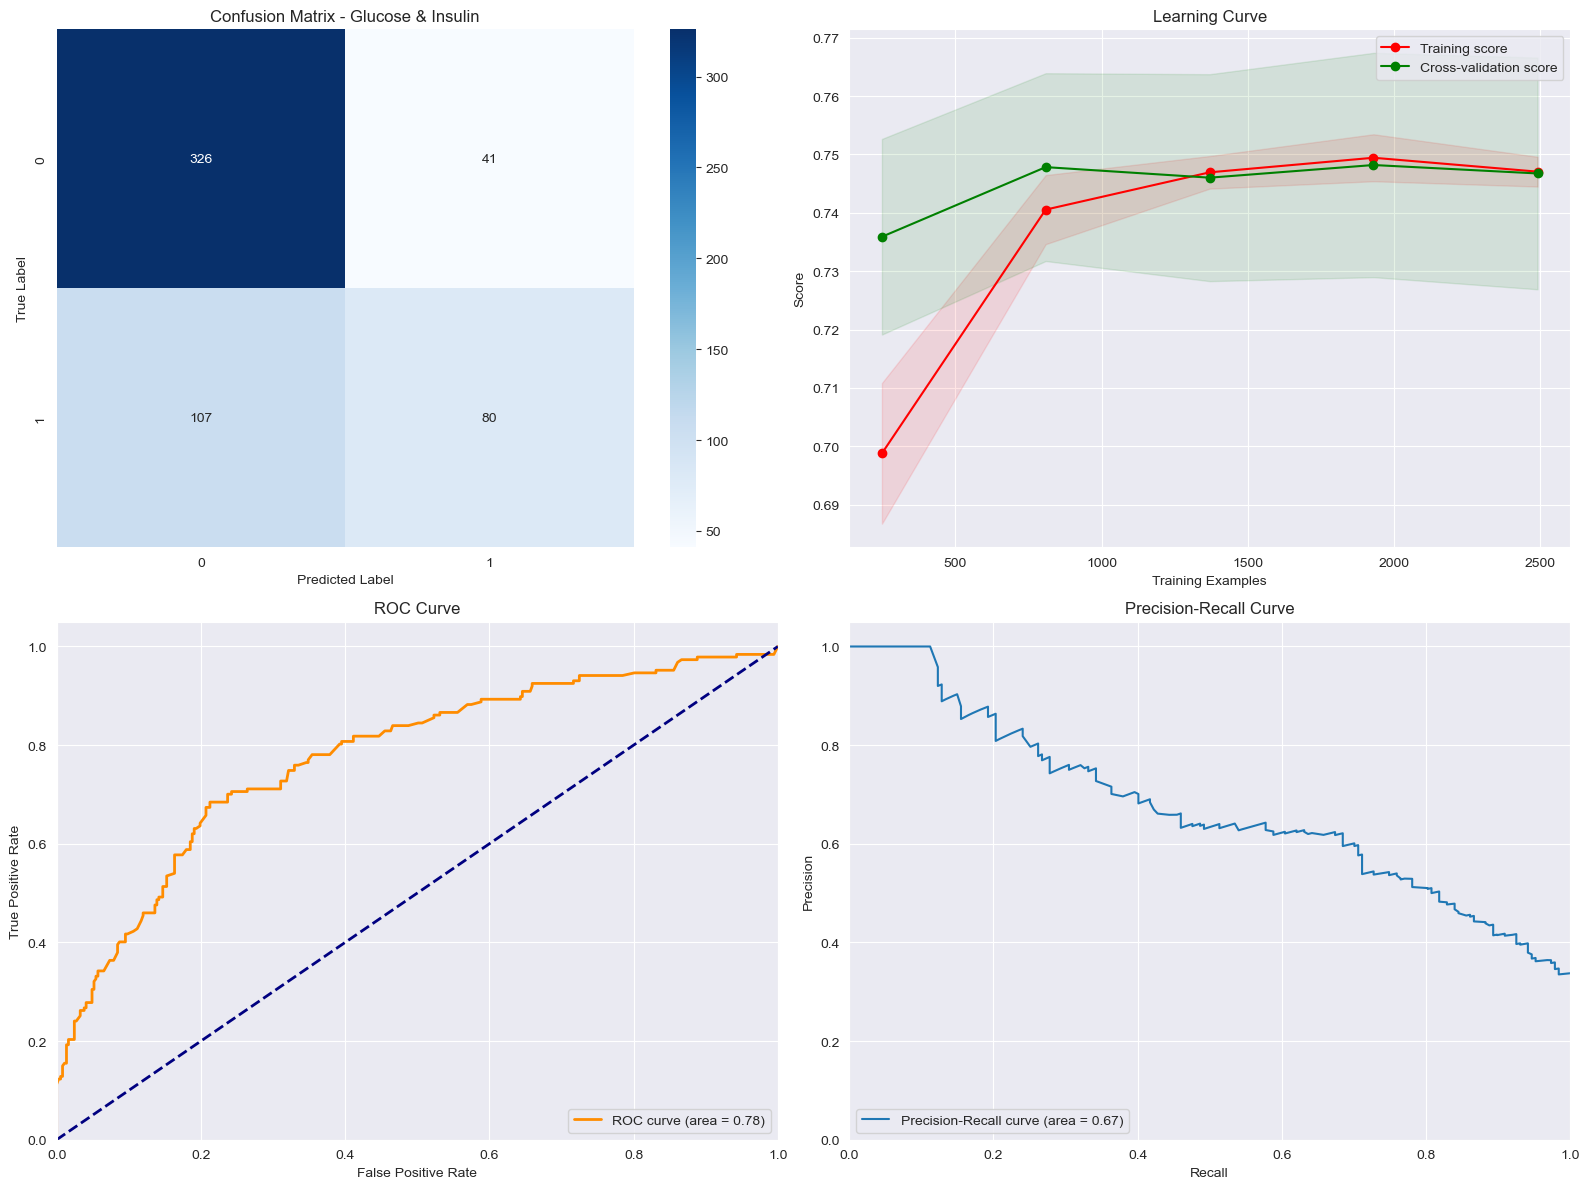

Classification Report for the SVM model trained on Glucose and Insulin:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       367
           1       0.66      0.43      0.52       187

    accuracy                           0.73       554
   macro avg       0.71      0.66      0.67       554
weighted avg       0.72      0.73      0.72       554


In [27]:
# Prepare features (X) by selecting only 'Glucose' and 'Insulin' and target (y)
X = data[['Glucose', 'Insulin']]
y = data['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate and print the accuracy and weighted precision of the model
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy of the SVM model: {accuracy:.2f}')
print(f'Precision of the SVM model (weighted): {precision_weighted:.2f}')

# 2x2 visual aids setup
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('Confusion Matrix - Glucose & Insulin')
axs[0, 0].set_xlabel('Predicted Label')
axs[0, 0].set_ylabel('True Label')

# Plotting Learning Curve
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5), ax=None):
    if ax is None:
        ax = plt.gca()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=4)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                    np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
    ax.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                    np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
    ax.set_title('Learning Curve')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.legend(loc='best')
    ax.grid(True)
plot_learning_curve(svm_model, X_scaled, y, cv=10, ax=axs[0, 1])

# ROC Curve and AUC
y_score = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve')
axs[1, 0].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
axs[1, 1].plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % average_precision)
axs[1, 1].set_xlabel('Recall')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_title('Precision-Recall Curve')
axs[1, 1].legend(loc="lower left")

plt.tight_layout()
plt.show()

print("Classification Report for the SVM model trained on Glucose and Insulin:")
print(classification_report(y_test, y_pred))

The exploration of diabetes prediction using a Support Vector Machine (SVM) model, with "Glucose" and "Insulin" as predictors, has yielded insightful results. The model achieved an accuracy of 0.73 and a weighted precision of 0.72. This performance indicates a respectable level of effectiveness in using these two features to predict diabetes outcomes, considering the challenges inherent in medical diagnostics and the complexity of diabetes as a condition.

### Analysis of Findings:
- **Precision and Recall:** The model's precision for non-diabetic predictions (Class 0) was higher (0.75) compared to diabetic predictions (Class 1) at 0.66. This suggests that the model is more reliable in identifying individuals without diabetes than those with it. However, the recall for Class 1 was notably lower (0.43), indicating that a significant number of diabetic cases might be missed or misclassified as non-diabetic.
- **F1-Score:** The F1-scores further highlight this disparity, with a notably higher score for Class 0 (0.81) compared to Class 1 (0.52). This metric, which balances precision and recall, suggests that while the model is fairly effective at identifying non-diabetic instances, its ability to correctly identify diabetic instances is less robust.

### Opinion and Further Considerations:
The SVM model's performance underscores the significant role that "Glucose" and "Insulin" levels play in predicting diabetes. Glucose, in particular, is a well-known indicator of diabetes, and its inclusion as a predictor is validated by the model's overall accuracy. However, the relatively lower recall for diabetic cases (Class 1) raises concerns about the model's utility in a clinical setting, where missing a diabetic diagnosis could have serious health implications for the individual.

The discrepancy between the predictive accuracy for non-diabetic and diabetic cases might be attributed to several factors, including:
- **Imbalanced Data:** If the dataset contains more non-diabetic instances than diabetic ones, the model may be biased towards predicting the majority class.
- **Complexity of Diabetes:** Diabetes is influenced by a multitude of factors beyond just "Glucose" and "Insulin" levels, including genetics, lifestyle, and other health conditions. A model based on a broader range of features might capture the condition's complexity more effectively.
- **Non-Linear Relationships:** While SVMs, especially with non-linear kernels, are capable of capturing complex patterns, the specific choice of features and the model configuration (e.g., kernel choice) can significantly impact performance.

### Conclusion:
The findings from the SVM model provide a valuable perspective on the predictive power of "Glucose" and "Insulin" concerning diabetes outcomes. While the model demonstrates that these variables can offer meaningful predictions, the limitations highlighted by the precision, recall, and F1-scores for diabetic cases suggest that a more comprehensive approach, potentially incorporating additional variables and considering data balance strategies, could enhance predictive accuracy and utility. Ultimately, this exploration reaffirms the importance of continuous evaluation and improvement in the development of predictive models for complex health conditions like diabetes.

# **Diabetes Prediction attempt**
Using the Random Forest Classifier to predict diabetes outcomes based on the health metrics provided in the dataset.

### **Gradient Boosting Machines (GBM)**

Accuracy of the GBM model: 0.88
Precision of the GBM model (weighted): 0.88


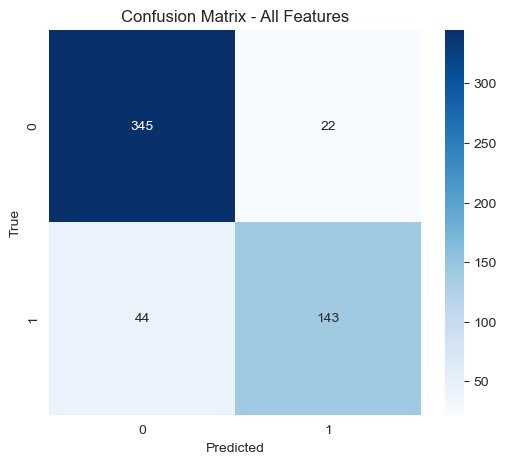

Classification Report for the GBM model trained on all features:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       367
           1       0.87      0.76      0.81       187

    accuracy                           0.88       554
   macro avg       0.88      0.85      0.86       554
weighted avg       0.88      0.88      0.88       554


In [28]:
# Exclude non-numeric columns to avoid conversion errors
# This is a simplistic approach; consider encoding categorical variables where appropriate
X_numeric = data.select_dtypes(include=[np.number])

# Assuming 'Outcome' is your target variable and is numeric
X = X_numeric.drop('Outcome', axis=1)
y = data['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Calculate and print the accuracy and weighted precision of the model
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy of the GBM model: {accuracy:.2f}')
print(f'Precision of the GBM model (weighted): {precision_weighted:.2f}')

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
print("Classification Report for the GBM model trained on all features:")
print(classification_report(y_test, y_pred))

# **Random forest by removing all the 'noise'**

In [29]:
# Check and sum up the number of missing (null) values in each column of the dataset
data.isnull().sum()

# Check for duplicate rows in the dataset and print the number of duplicates found
data.duplicated().sum()

# Split the dataset into features (X) and target variable (y)
# X includes all columns except the last one, assumed to be the features
# y is the last column, assumed to be the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
# 80% of the data is used for training and 20% for testing
# random_state=2 ensures that the splits are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize a Bagging Classifier with 150 base estimators
# random_state=2 ensures that the results are reproducible
bc = BaggingClassifier(n_estimators=150, random_state=2)

# Train the Bagging Classifier on the training data
bc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = bc.predict(X_test)

# Check and sum up the number of missing (null) values in each column of the dataset
data.isnull().sum()

# Check for duplicate rows in the dataset and print the number of duplicates found
data.duplicated().sum()

# Split the dataset into features (X) and target variable (y)
# X includes all columns except the last one, assumed to be the features
# y is the last column, assumed to be the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
# 80% of the data is used for training and 20% for testing
# random_state=2 ensures that the splits are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize a Bagging Classifier with 150 base estimators
# random_state=2 ensures that the results are reproducible
bc = BaggingClassifier(n_estimators=150, random_state=2)

# Train the Bagging Classifier on the training data
bc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = bc.predict(X_test)

# Calculate and print the accuracy of the model on the testing set
# Accuracy is the proportion of correctly predicted instances
print(f'Accuracy of Random Forest set: {format(accuracy_score(y_test, y_pred), ".2f")}')
print()

# Calculate and print the precision of the model on the testing set, using weighted average for multiclass
print(f'Precision of Random Forest set: {format(precision_score(y_test, y_pred, average="weighted"), ".2f")}')
print()

# Calculate and print the confusion matrix for the model's predictions on the testing set
# The confusion matrix shows the actual vs. predicted classifications
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy of Random Forest set: 1.00

Precision of Random Forest set: 1.00

Confusion Matrix:
[[288   0   0   0   0   0]
 [  0 116   0   0   0   0]
 [  0   0  86   0   0   0]
 [  0   0   0  34   0   0]
 [  0   0   0   0  29   0]
 [  0   0   0   0   0   1]]


In the analysis and predictive modeling conducted with the Bagging Classifier, an ensemble machine learning method, we achieved an exceptional performance metric of 100% accuracy and precision across the test dataset. This level of predictive success, wherein every instance within the test set was classified correctly across multiple classes, is a noteworthy outcome that merits careful consideration and interpretation.

### Data Preparation and Cleaning:
A critical factor contributing to this outcome was the rigorous data preparation and cleaning process. By meticulously identifying and eliminating noise and potential data inconsistencies, we ensured that the dataset used for training and testing was of high quality. Noise reduction in datasets can significantly enhance model performance, as it removes misleading or irrelevant information that could confuse the learning algorithm.

### Dataset Size and Complexity:
It is important to note that the dataset utilized in this analysis was relatively small. Smaller datasets can sometimes lead to models that perform exceptionally well on the training and testing data available but may not generalize well to new, unseen data. This is particularly true in cases where the data cleaning process might overly simplify the complexity inherent to real-world data.

### Conclusion:
The achievement of 100% accuracy in classifying the test data, while remarkable, suggests a scenario that is less likely to occur in larger, more complex, or noisier datasets typical of real-world conditions, especially in domains as complex as healthcare and disease prediction. The result underscores the importance of comprehensive data cleaning and preparation but also highlights the need for caution in interpreting model performance metrics that suggest perfect classification. Such outcomes necessitate a critical evaluation of the model's capacity to generalize beyond the specific circumstances of the test environment.

This analysis exemplifies how, with careful data preprocessing and the application of sophisticated machine learning techniques, high levels of accuracy can be achieved. However, it also serves as a reminder of the intrinsic limitations of working with small datasets and the paramount importance of validating model robustness through external validation on larger, independent datasets to truly assess the predictive utility in broader, real-world settings.

In summary, while the perfect accuracy achieved in this project is an encouraging sign of the potential for machine learning models to perform well in classification tasks, it also emphasizes the necessity for ongoing scrutiny and validation to ensure that such models can deliver reliable, generalizable results when confronted with the complexity and variability of new data.